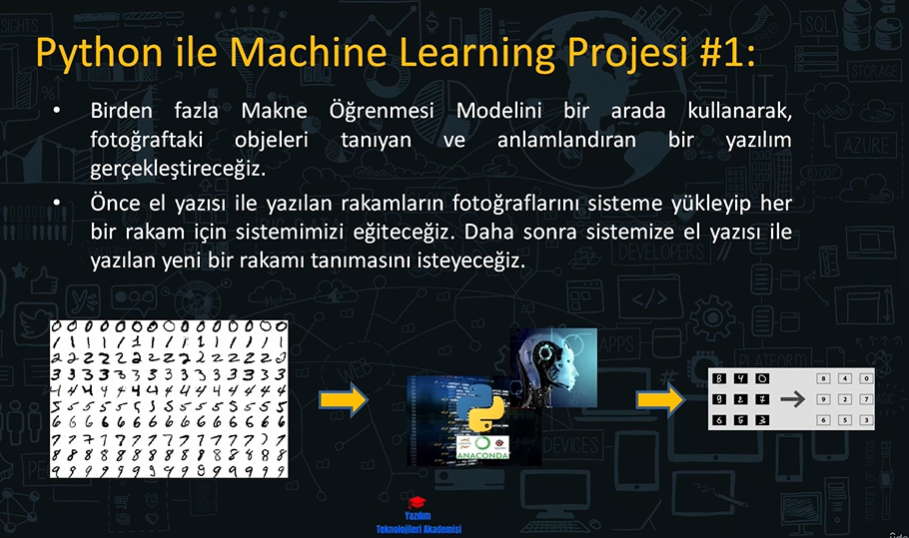

In [1]:
from IPython.display import Image
Image('1.png')

# Fotoğralardaki El Yaziısı Rakamları Otomatik Tanıma Ve Anlamlandırma 
60000 train 10000 i test


In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml ## Minst data setini yuklemek için gerekli
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')



In [2]:
mnist.data.shape

(70000, 784)

#### Mnist veri setindeki rakam fotoğraflarını görmek içn fonksiyon tanımlayalım

In [3]:
# parametre olarak dataframe ve ilgili veri ftoğrafının index numarasını alsın
def show(dframe,index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

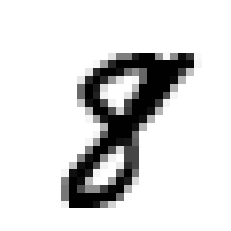

In [4]:
#örnek olarak 
show(mnist.data, 55)

##### Split Data --> Training Set ve Test Set 

In [5]:
# test ve train oranı 1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data,mnist.target,test_size=1/7.0,random_state=0)

In [6]:
type(train_img)

pandas.core.frame.DataFrame

In [7]:
test_img_copy = test_img.copy()

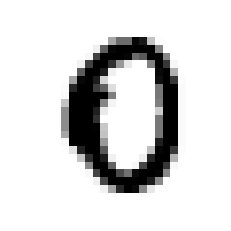

In [8]:
show(test_img_copy , 0)

#### Verilerimizi Scale etmemiz gerekyor:
###### # Çünkü PCA scale edilmemiş verilerde hatalı sonuçlar verebiliyor Bu nedele mutlaka sacaling işleminden geçiyoruz. Bu amaçla Standartscaler kullanıyoruz...

In [9]:
scaler = StandardScaler()

#Scaleri Sadece training test üzerinden fit yapmamız yeterkli
scaler.fit(train_img)
# ama transform her ikisi de 
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## PCA işlemini uyguluyoruz
Variance 'ın 95% oranında korunması istediğimizi belirtiyoruz

In [10]:
pca = PCA(.95)

In [11]:
#PCA'i sadece training sete yapmamız yeterli
pca.fit(train_img)

PCA(n_components=0.95)

In [12]:
#bakalım 784 boyutu kaça düşürmüş
print(pca.n_components_)

327


In [13]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [14]:
train_img.shape

(60000, 327)

In [15]:
test_img.shape

(10000, 327)

###### şimdi 2. Makine Öğrenmesi modelimiz olan Logistic Regression modelimizi PCA işleminden geçirilmiş verisetimiz üzerinde uygulayacağız


In [16]:
logisticRegressor = LogisticRegression(solver="lbfgs",max_iter=10000)

In [17]:
##eğitim 

logisticRegressor.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

In [18]:
### el yazısı rakamları makine öğrenmesi ile tanıma işlemini gerçekleştirelim:
logisticRegressor.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

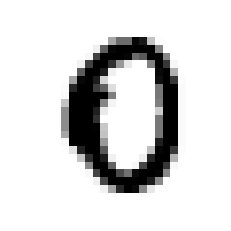

In [19]:
show(test_img_copy,0)

In [20]:
logisticRegressor.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

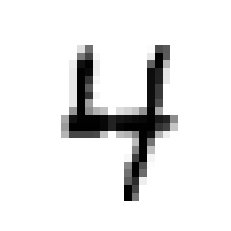

In [21]:
show(test_img_copy,1)

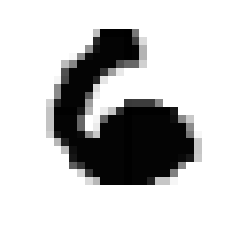

In [22]:
show(test_img_copy,1555)

In [23]:
logisticRegressor.predict(test_img[1555].reshape(1,-1))

array(['6'], dtype=object)

##### Modelimizin doğruluk oranı (accuracy) ölçmek

In [24]:
print("%",int(logisticRegressor.score(test_img,test_lbl)*100))

% 91
